<a href="https://colab.research.google.com/github/Gnome101/MAT_421/blob/main/Homework_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import scipy interpolation methods
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
#Import matplotlib
import matplotlib.pyplot as plt
#Change plot stlye
plt.style.use('seaborn-poster')
#Import numpy
import numpy as np


<ipython-input-2-dc64ad1a394c>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


# Interpolation
Interplation gives us an estimation for a function that passes through every point in our data set. This differs from regression because its not trying to minimze a distance.

# 17.1 Linear Interpolation

Within linear interpolation the estimated point is assumed to lie on th eline joining the nearest points to the left and right.
This example will find the linear interpolation for a set of data

In [ ]:
#Data set is below
#Goal is to find what the estimated y value for 2 would be
x = [0,1,3,4,5]
y = [1,6,7,2,8]
f = interp1d(x, y)
y_hat = f(2)
print("ŷ(2) =" , y_hat)

ŷ(2) = 6.5


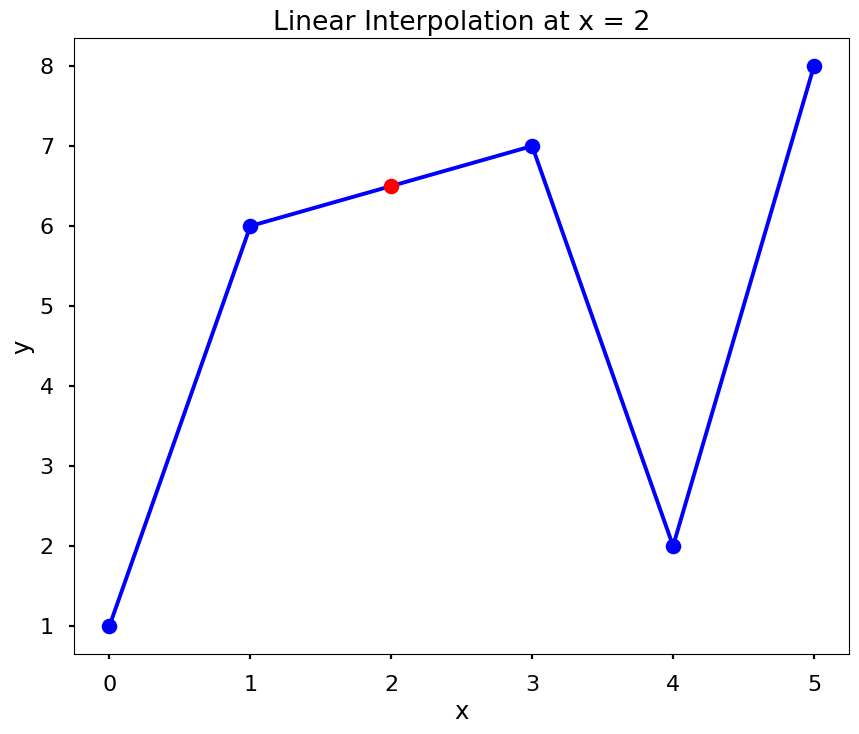

In [ ]:
#Below we plot the interpolation
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(2, y_hat, 'ro')
plt.title('Linear Interpolation at x = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#Notice how the red dot, our point, lies exactly on the line between the points
#next to it

# 17.2 Cubic Spline Interpolation

Cubic spline interpolation involves creating a set of piecewise cubic functions which join the points together.
Each polynomial looks like:  $a_ix^3 + b_ix^2 + c_ix + d_i$  
Need to know the coefficents: $a_i, b_i, c_i, d_i$
The contraints are that each function must start and end at the point on the left and right.
The ends and beginnigs also need to have continuous first deriviatives.
The second derivative of each polynomial needs to be 0 at the endpoints.

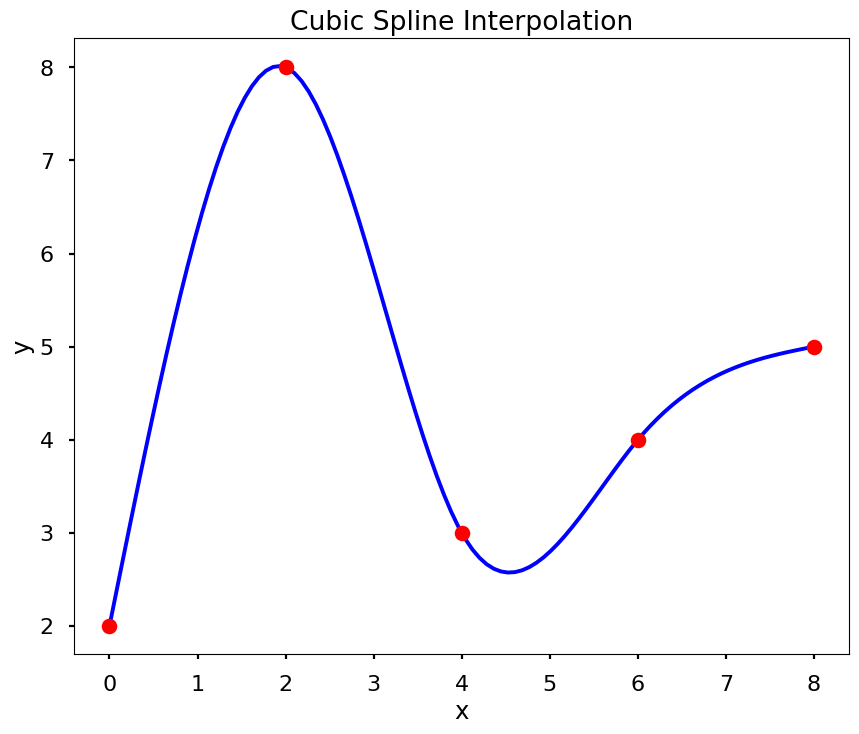

In [ ]:
x = [0,2,4,6,8]
y = [2,8,3,4,5]
# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 8, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.3 Lagrange Polynomial Interpolation

Langrange polynomial interpolation finds a single polynomial L(x) as an interpolation function.
The example below shows how you would find P for a function with 3 points.

$P_1(x) = \frac{(x-x_2)(x-x_3)}{(x_1 - x_2)(x_1-x_3)} $

$P_2(x) = \frac{(x-x_1)(x-x_3)}{(x_2 - x_1)(x_2-x_3)} $

$P_3(x) = \frac{(x-x_1)(x-x_2)}{(x_3 - x_1)(x_3-x_2)} $



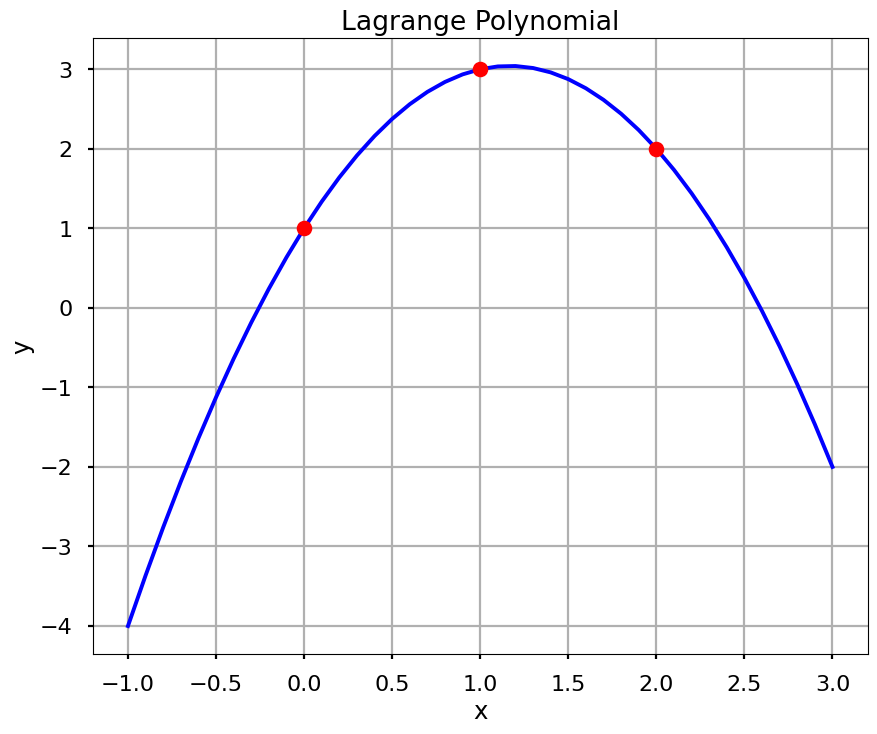

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]
x_new = np.arange(-1.0, 3.1, 0.1)
f = lagrange(x,y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.4 Newton's Polynomial Interpolation

Newtons polynomial is another way to fix a polynomial for an exact set.
Its made up of divided differences between each of the data points.
The polynomial is expressed as
$P(x) = a_0 + a_1(x - x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n})$
The specialy of the method lies in how the points can be simply determined

For example

$f(x_0) = a_0 = y+0$

$f(x_1) = a_0 + a_1(x_1 - x_0)$
The divided differences make it so that adding new points doesn't change calculated ones.

In [3]:
#Below we will define two functions that will help us determine the newton polynomial
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

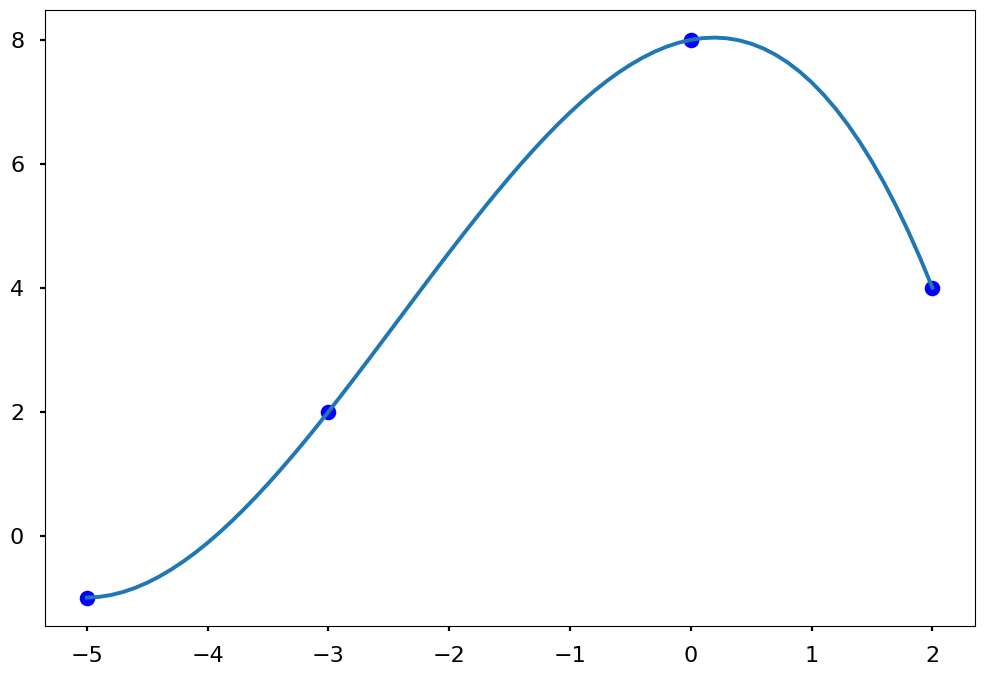

In [6]:
x = np.array([-5, -3, 0, 2])
y = np.array([-1, 2, 8, 4])
# get the divided difference coefficents
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)